In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import PiecewiseAggregateApproximation
import os
import pandas as pd
import json
from statsmodels.tsa.seasonal import STL

## Section 2.2.1 Dynamic Behavior Capturing using Data Binning

## Figure 2.6

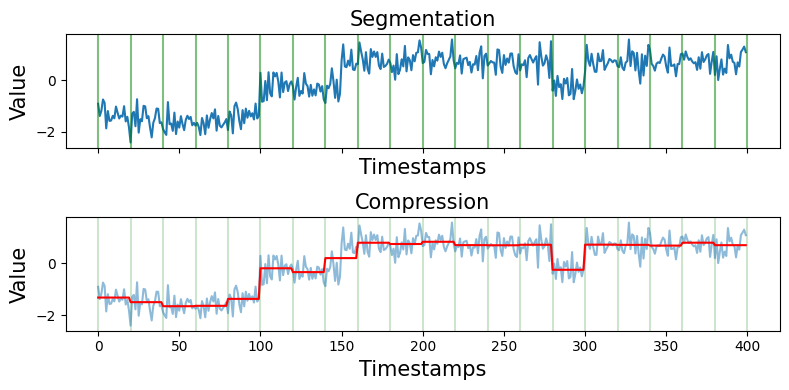

In [10]:
np.random.seed(0)
trend = np.zeros(100)
trend = np.concatenate([trend, np.ones(50)])
trend = np.concatenate([trend, 2 * np.ones(130)])
trend = np.concatenate([trend, 1 * np.ones(20)])
trend = np.concatenate([trend, 2 * np.ones(100)])

residual = 0.3 * np.random.randn(len(trend))
ts = trend + residual
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts_z = scaler.fit_transform([ts])

n_paa_segments = 20   ## bin size
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)  ## PAA method
paa_dataset_inv = paa.inverse_transform(paa.fit_transform(ts_z))

min_y = min(ts_z[0])
max_y = max(ts_z[0])
fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
axes[0].set_title('Segmentation', fontsize=15)
axes[0].plot(ts_z[0], label='Time series data')
for i in np.arange(0,len(ts_z[0])+20,20):
    axes[0].axvline(i, color='g', alpha=0.5)
    axes[1].axvline(i, color='g', alpha=0.2)
axes[0].set_xlabel('Timestamps', fontsize=15)
axes[0].set_ylabel('Value', fontsize=15)


axes[1].set_title('Compression', fontsize=15)
axes[1].plot(ts_z[0], alpha=0.5, label='Time series data')
axes[1].plot(paa_dataset_inv[0].ravel(), 'r', label='Sketching result')
axes[1].set_xlabel('Timestamps', fontsize=15)
axes[1].set_ylabel('Value', fontsize=15)
# axes[1].legend(fontsize="13")        
# Adjust layout
plt.tight_layout()


# Show the plot
plt.show()

## Section 2.2.2 Season Length Estimation (SLE)
## figure 2.7

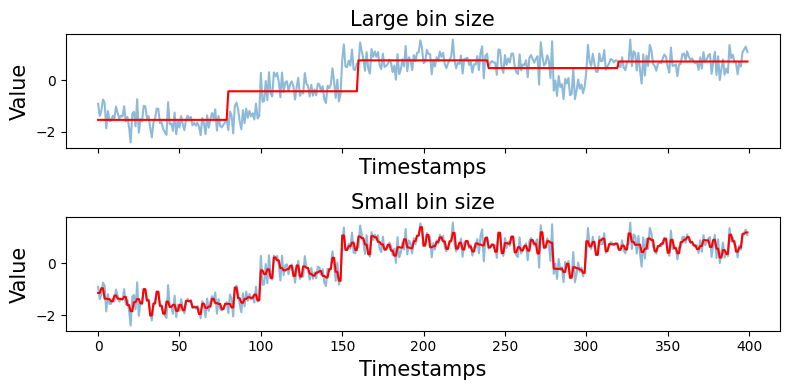

In [11]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

np.random.seed(0)
trend = np.zeros(100)
trend = np.concatenate([trend, np.ones(50)])
trend = np.concatenate([trend, 2 * np.ones(130)])
trend = np.concatenate([trend, 1 * np.ones(20)])
trend = np.concatenate([trend, 2 * np.ones(100)])

residual = 0.3 * np.random.randn(len(trend))
ts = trend + residual
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts_z = scaler.fit_transform([ts])

n_paa_segments = 5
paa_big = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_big_inv = paa_big.inverse_transform(paa_big.fit_transform(ts_z))

n_paa_segments = 200
paa_small = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
paa_small_inv = paa_small.inverse_transform(paa_small.fit_transform(ts_z))

min_y = min(ts_z[0])
max_y = max(ts_z[0])
fig, axes = plt.subplots(2, 1, figsize=(8, 4), sharex=True)
axes[0].set_title('Large bin size', fontsize=15)
axes[0].plot(ts_z[0], alpha=0.5, label='Time series data')
axes[0].plot(paa_big_inv[0].ravel(), 'r', label='Sketching result')
axes[0].set_xlabel('Timestamps', fontsize=15)
axes[0].set_ylabel('Value', fontsize=15)


axes[1].set_title('Small bin size', fontsize=15)
axes[1].plot(ts_z[0], alpha=0.5, label='Time series data')
axes[1].plot(paa_small_inv[0].ravel(), 'r', label='Sketching result')
axes[1].set_xlabel('Timestamps', fontsize=15)
axes[1].set_ylabel('Value', fontsize=15)  

plt.tight_layout()
plt.show()

## Figure 2.8

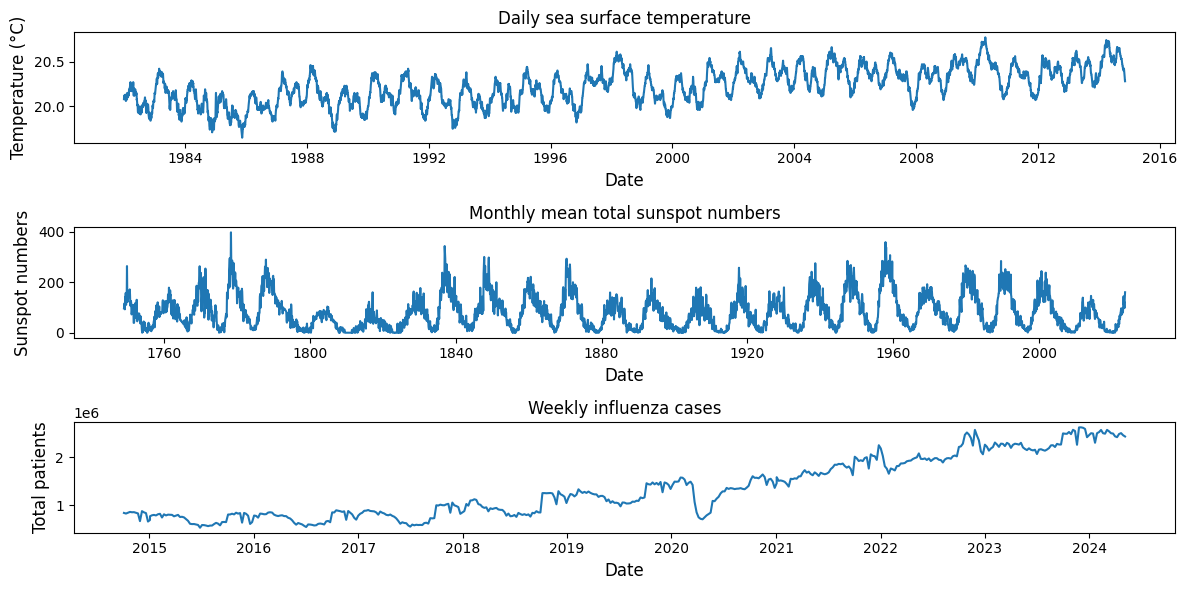

In [12]:
fontsize = 12
fig, axes = plt.subplots(3, 1, figsize=(12, 6))
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/oisst2.1_world2_sst_day.json")

# Load JSON data
with open(file_name, 'r') as file:
    json_data = json.load(file)
ts = []
for sublist in json_data[1:42]:
    ts += [element for element in sublist['data'] if element != None]
ts = ts[:12000]
start_date = '1982-01-01'
end_date = '2022-12-31'
date_sequence = pd.date_range(start=start_date, end=end_date)
date_sequence = date_sequence[:12000]
ssft_df = pd.DataFrame({'Date': date_sequence, 'Data': ts})
axes[0].plot(ssft_df['Date'], ssft_df['Data'])
axes[0].set_title('Daily sea surface temperature', fontsize=fontsize)
axes[0].set_xlabel('Date', fontsize=fontsize)
axes[0].set_ylabel('Temperature (°C)', fontsize=fontsize)

file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/06_sunspots.json")
with open(file_name, 'r') as file:
    json_data = json.load(file)

sun = []
sun = pd.Series(json_data['ts'])
start_date = '1749-01-01'
end_date = '2023-07-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
sun_df = pd.DataFrame({'Date': date_sequence, 'Data': sun})
axes[1].plot(sun_df['Date'], sun_df['Data'])
axes[1].set_title('Monthly mean total sunspot numbers', fontsize=fontsize)
axes[1].set_xlabel('Date', fontsize=fontsize)
axes[1].set_ylabel('Sunspot numbers', fontsize=fontsize)


# influenza-like illness
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/ILINet_2015_2024.csv")
ill_df = pd.read_csv(file_name)
ill_df['date'] = pd.to_datetime(ill_df['YEAR'].astype(str) + ill_df['WEEK'].astype(str) + '0', format='%Y%U%w')
axes[2].plot(ill_df['date'], ill_df['TOTAL_PATIENTS'])
axes[2].set_title('Weekly influenza cases', fontsize=fontsize)
axes[2].set_xlabel('Date', fontsize=fontsize)
axes[2].set_ylabel('Total patients', fontsize=fontsize)
# axes[2].yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
plt.tight_layout()
plt.show()

## section 2.2.3 Seasonal-Trend Decomposition (STD)
## figure 2.9

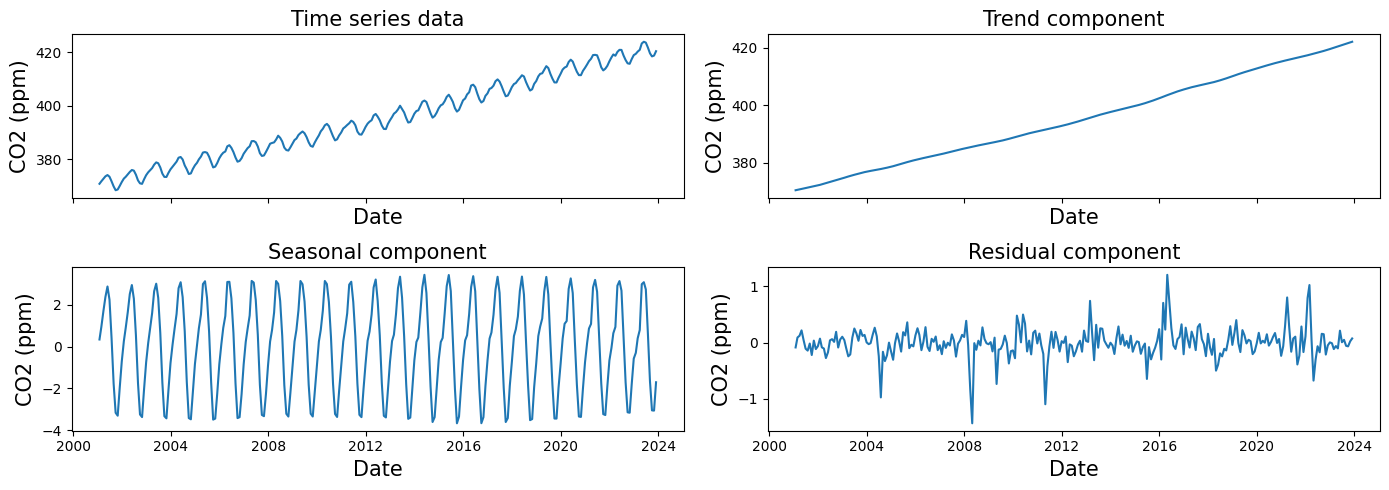

In [18]:
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/03_co2.json")
# Load JSON data
with open(file_name, 'r') as file:
    json_data = json.load(file)

co2 = []
co2 = pd.Series(json_data['ts'])
start_date = '1958-03-01'
end_date = '2023-12-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
co2_df = pd.DataFrame({'Date': date_sequence, 'Data': co2})
co2_df = co2_df[co2_df['Date'].dt.year  > 2000]
stl = STL(co2_df['Data'], period=12, robust=True).fit()   ## season length = 12

fig, axes = plt.subplots(2, 2, figsize=(14, 5), sharex=True)
axes = axes.flatten()
title = ['Time series data', 'Trend component', 'Seasonal component', 'Residual component']
axes[0].plot(co2_df['Date'], co2_df['Data'])
axes[1].plot(co2_df['Date'], stl.trend)
axes[2].plot(co2_df['Date'], stl.seasonal)
axes[3].plot(co2_df['Date'], stl.resid)

# Set common x and y ticks
for i, ax in enumerate(axes):
    # ax.tick_params(axis='both', labelsize=18)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('CO2 (ppm)', fontsize=15)
    ax.set_title(title[i], size=15)
        
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Figure 2.10

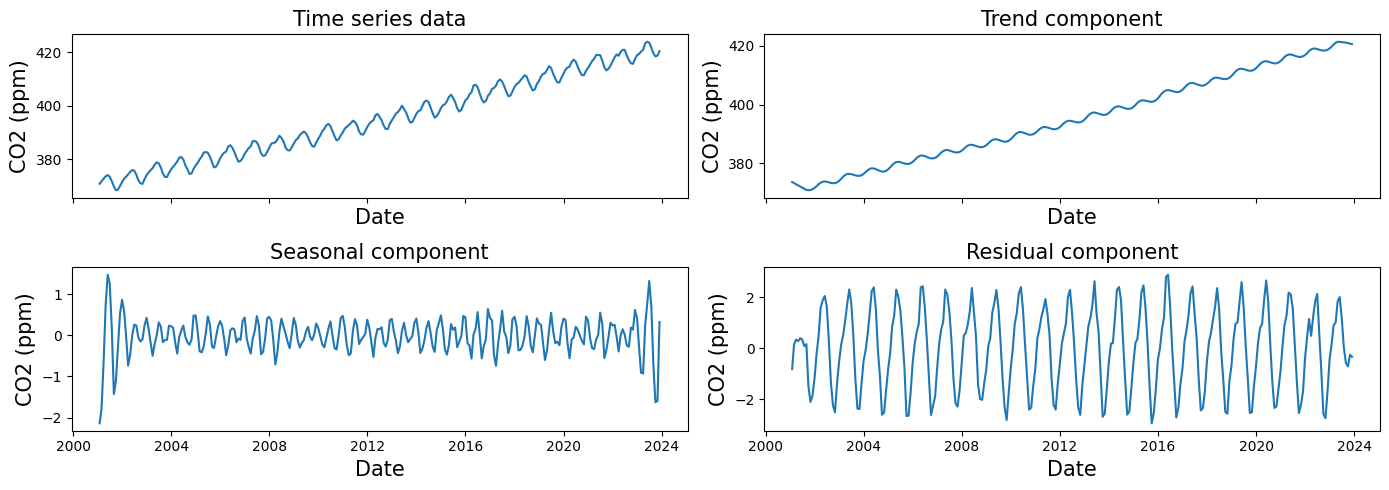

In [19]:
file_name = os.path.expanduser("~/source_code/thesis_sourcecode/datasets/03_co2.json")
# Load JSON data
with open(file_name, 'r') as file:
    json_data = json.load(file)

co2 = []
co2 = pd.Series(json_data['ts'])
start_date = '1958-03-01'
end_date = '2023-12-01'
date_sequence = pd.date_range(start=start_date, end=end_date, freq='ME')
co2_df = pd.DataFrame({'Date': date_sequence, 'Data': co2})
co2_df = co2_df[co2_df['Date'].dt.year  > 2000]
stl = STL(co2_df['Data'], period=7, robust=True).fit()   ## season length = 7

fig, axes = plt.subplots(2, 2, figsize=(14, 5), sharex=True)
axes = axes.flatten()
title = ['Time series data', 'Trend component', 'Seasonal component', 'Residual component']
axes[0].plot(co2_df['Date'], co2_df['Data'])
axes[1].plot(co2_df['Date'], stl.trend)
axes[2].plot(co2_df['Date'], stl.seasonal)
axes[3].plot(co2_df['Date'], stl.resid)

# Set common x and y ticks
for i, ax in enumerate(axes):
    # ax.tick_params(axis='both', labelsize=18)
    ax.set_xlabel('Date', fontsize=15)
    ax.set_ylabel('CO2 (ppm)', fontsize=15)
    ax.set_title(title[i], size=15)
        
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()